In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.3 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
def perform_value_iteration(environment, tolerance=1e-6, gamma=0.9):
    value_function = np.zeros(environment.observation_space.n)
    while True:
        delta = 0
        for state in range(environment.observation_space.n):
            old_value = value_function[state]
            action_values = np.zeros(environment.action_space.n)
            for action in range(environment.action_space.n):
                for prob, next_state, reward, done in environment.P[state][action]:
                    action_values[action] += prob * (reward + gamma * value_function[next_state])
            value_function[state] = max(action_values)
            delta = max(delta, abs(old_value - value_function[state]))
        if delta < tolerance:
            break

    optimal_policy = np.zeros([environment.observation_space.n, environment.action_space.n])
    for state in range(environment.observation_space.n):
        action_values = np.zeros(environment.action_space.n)
        for action in range(environment.action_space.n):
            for prob, next_state, reward, done in environment.P[state][action]:
                action_values[action] += prob * (reward + gamma * value_function[next_state])
        best_action = np.argmax(action_values)
        optimal_policy[state, best_action] = 1.0
    return optimal_policy, value_function


In [4]:
def run_simulation(num_episodes, visualize=False):
    environment = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode='human' if visualize else None)

    optimal_policy, optimal_value_function = perform_value_iteration(environment)

    episode_rewards = np.zeros(num_episodes)

    for episode in range(num_episodes):
        state = environment.reset()[0]
        game_finished = False
        timeout_occurred = False

        while not game_finished and not timeout_occurred:
            action = np.argmax(optimal_policy[state])
            next_state, reward, game_finished, timeout_occurred, _ = environment.step(action)
            state = next_state

        episode_rewards[episode] = reward

    environment.close()

    cumulative_rewards = np.zeros(num_episodes)
    for i in range(num_episodes):
        cumulative_rewards[i] = np.sum(episode_rewards[max(0, i - 100):(i + 1)])
    plt.plot(cumulative_rewards)
    plt.savefig('frozen_lake_value_iteration.png')

    with open("frozen_lake_value_iteration_policy.pkl", "wb") as file:
        pickle.dump(optimal_policy, file)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


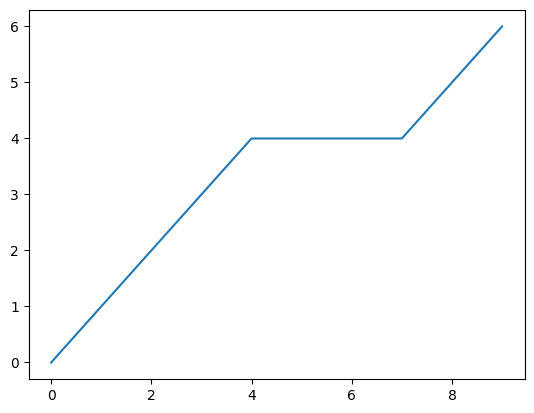

In [6]:
run_simulation(1500, visualize=True)